<a href="https://colab.research.google.com/github/Athurnm/MachineLearning/blob/master/NLP_Text_classification_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Importing Dependencies
# Using Recurrent neural network
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding, SpatialDropout1D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

# Install for saving model
!pip install h5py pyyaml
!pip install tf_nightly

     |████████████████████████████████| 109.0MB 44.9MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 3.1MB 15.5MB/s 
     |████████████████████████████████| 491kB 46.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/89/67/41/63cbf0f6ac0a6156588b9587be4db5565f8c6d8ccef98202fc
Successfully built wrapt
ERROR: thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
  Found existing installation: wrapt 1.10.11
    Uninstalling wrapt-1.10.11:
      Successfully uninstalled wrapt-1.10.11


#Data Preparation

In [35]:
# Importing data from drive
from google.colab import files
uploaded = files.upload()

Saving DB INTENT.csv to DB INTENT (2).csv


In [0]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['DB INTENT.csv'].decode('utf-8')))

In [37]:
# Checking data
df.head()

,TEKS_KALIMAT,ID_KONTEKS
0,"bisa dibantu maaf, selamat pagi",33
1,"mbak, saya mau melaporkan ini gangguan telepon",12
2,"sering kali nggak bisa ditelepon, nggak bisa t...",12
3,kan sejak diganti sama ada dikasih modem itu,12
4,iya baik,19


In [38]:
# Load tools we need for preprocessing
# Tokenizer use to tokenize text into words
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['TEKS_KALIMAT'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6691 unique tokens.


In [39]:
X = tokenizer.texts_to_sequences(df['TEKS_KALIMAT'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (21174, 250)


In [40]:
target = pd.get_dummies(df['ID_KONTEKS'].values)
print('Shape of data tensor:', target.shape)

Shape of data tensor: (21174, 42)


In [0]:
#from sklearn.preprocessing import LabelBinarizer

In [0]:
#encoder = LabelBinarizer()
#encoder.fit(ta)
#target = encoder.transform(ta)

In [0]:
#print(ta[0])
#print(target[1])

In [0]:
# convert pandas dataframe to string type (for list)
#text = df['TEKS_KALIMAT']
#text = text.astype(str)


# target = df['ID_KONTEKS_ALT_1'].values.tolist()
#target = df['ID_KONTEKS']
#target = target.astype(str)

In [0]:
# change to list type
#t = text.tolist()
#ta = target.tolist()
#print(type(t))
#print(type(ta))

In [0]:
#VOCAB_SIZE = 20000 #define vocabulary size is 20000

In [0]:
#tokenizer = Tokenizer(num_words=VOCAB_SIZE) # Setup tokenizer

In [0]:
#tokenizer.fit_on_texts(t)

In [0]:
#text = tokenizer.texts_to_matrix(t, mode='tfidf')

In [0]:
#tokenizer.index_word #list words

In [0]:
#word_index = tokenizer.word_index
#print('Found %s unique tokens.' % len(word_index))

##Data Split for Train and Validation

In [0]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, target, test_size=0.2, random_state=1)

#RNN Model

In [0]:
# Instatiate model
model = Sequential()

In [0]:
# Input layer with embedding words
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
model.add(SpatialDropout1D(0.2))

# Hidden layer RNN using LSTM
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

# Output layer 42 class
model.add(Dense(42, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 100
batch_size = 64

In [55]:
# using early stopping
history = model.fit(Xtrain, Ytrain, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.1)])

Train on 13551 samples, validate on 3388 samples
Epoch 1/100
13551/13551 [==============================] - 90s 7ms/step - loss: 2.8592 - acc: 0.1977 - val_loss: 2.6352 - val_acc: 0.2403
Epoch 2/100
13551/13551 [==============================] - 89s 7ms/step - loss: 2.5428 - acc: 0.2715 - val_loss: 2.4461 - val_acc: 0.2816
Epoch 3/100
13551/13551 [==============================] - 89s 7ms/step - loss: 2.3458 - acc: 0.3256 - val_loss: 2.3409 - val_acc: 0.3120
Epoch 4/100
13551/13551 [==============================] - 87s 6ms/step - loss: 2.1724 - acc: 0.3626 - val_loss: 2.2889 - val_acc: 0.3244
Epoch 5/100
13551/13551 [==============================] - 87s 6ms/step - loss: 2.0321 - acc: 0.4030 - val_loss: 2.2461 - val_acc: 0.3462
Epoch 6/100
13551/13551 [==============================] - 88s 6ms/step - loss: 1.9058 - acc: 0.4437 - val_loss: 2.2394 - val_acc: 0.3545
Epoch 7/100
13551/13551 [==============================] - 88s 6ms/step - loss: 1.7941 - acc: 0.4743 - val_loss: 2.2051 - v

In [0]:
model.save('NLP_Classification_LSTM_EarlyStopping.h5')

In [57]:
# without early stopping
history2 = model.fit(Xtrain, Ytrain, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Train on 15245 samples, validate on 1694 samples
Epoch 1/100
15245/15245 [==============================] - 95s 6ms/step - loss: 1.3048 - acc: 0.6114 - val_loss: 2.2770 - val_acc: 0.3896
Epoch 2/100
15245/15245 [==============================] - 94s 6ms/step - loss: 1.2378 - acc: 0.6237 - val_loss: 2.2658 - val_acc: 0.3878
Epoch 3/100
15245/15245 [==============================] - 93s 6ms/step - loss: 1.1877 - acc: 0.6374 - val_loss: 2.3104 - val_acc: 0.3902
Epoch 4/100
15245/15245 [==============================] - 94s 6ms/step - loss: 1.1527 - acc: 0.6453 - val_loss: 2.3020 - val_acc: 0.3973
Epoch 5/100
15245/15245 [==============================] - 94s 6ms/step - loss: 1.1100 - acc: 0.6583 - val_loss: 2.3315 - val_acc: 0.3855
Epoch 6/100
15245/15245 [==============================] - 93s 6ms/step - loss: 1.0693 - acc: 0.6697 - val_loss: 2.3595 - val_acc: 0.3890
Epoch 7/100
15245/15245 [==============================] - 94s 6ms/step - loss: 1.0426 - acc: 0.6722 - val_loss: 2.3661 - v

In [0]:
model.save('NLP_Classification_LSTM.h5')

#Evaluate Model

In [59]:
# Evaluate accuracy with test data chunk
accr = model.evaluate(Xtest,Ytest)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4235/4235 [==============================] - 11s 3ms/step
Test set
  Loss: 4.108
  Accuracy: 0.390


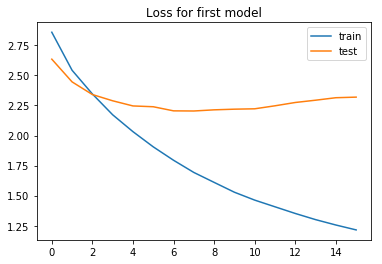

In [62]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the first model loss and validating loss for knowing overfit and underfit
plt.title('Loss for first model')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

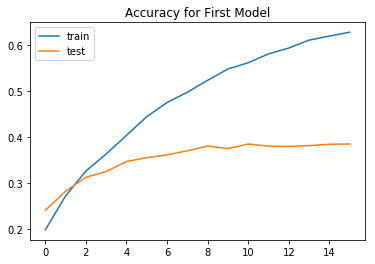

In [63]:
# Plot the first model accuracy and validating accuracy for knowing overfit and underfit
plt.title('Accuracy for First Model')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();